In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
veri = pd.read_csv('datasets/airbnb_dataset.csv')
veri.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,20815,The Bosphorus from The Comfy Hill,78838,Gülder,NaN,Besiktas,41.06984,29.04545,Entire home/apt,965,365,41,2018-11-07,0.32,2,356
1,27271,Lovely apartment in perfect location,117026,Mutlu,NaN,Beyoglu,41.03254,28.98153,Entire home/apt,289,30,10,2018-05-04,0.32,1,0
2,28318,Cosy home overlooking Bosphorus,121721,Aydin,NaN,Sariyer,41.09048,29.05559,Entire home/apt,1018,3,0,NaN,NaN,1,88
3,29241,"↪ Istanbul, Your second house",125742,Şevki,NaN,Beyoglu,41.04844,28.95254,Private room,407,3,0,NaN,NaN,1,365
4,30697,nice home in popular area,132137,Nan,NaN,Beyoglu,41.03350,28.97626,Private room,952,1,1,2010-06-14,0.01,1,364


In [3]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22328 entries, 0 to 22327
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22328 non-null  int64  
 1   name                            22294 non-null  object 
 2   host_id                         22328 non-null  int64  
 3   host_name                       22318 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   22328 non-null  object 
 6   latitude                        22328 non-null  float64
 7   longitude                       22328 non-null  float64
 8   room_type                       22328 non-null  object 
 9   price                           22328 non-null  int64  
 10  minimum_nights                  22328 non-null  int64  
 11  number_of_reviews               22328 non-null  int64  
 12  last_review                     

In [4]:
veri = veri.drop(columns=['id','name','host_id','host_name'])
veri.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,NaN,Besiktas,41.06984,29.04545,Entire home/apt,965,365,41,2018-11-07,0.32,2,356
1,NaN,Beyoglu,41.03254,28.98153,Entire home/apt,289,30,10,2018-05-04,0.32,1,0
2,NaN,Sariyer,41.09048,29.05559,Entire home/apt,1018,3,0,NaN,NaN,1,88
3,NaN,Beyoglu,41.04844,28.95254,Private room,407,3,0,NaN,NaN,1,365
4,NaN,Beyoglu,41.03350,28.97626,Private room,952,1,1,2010-06-14,0.01,1,364


In [5]:
veri.isnull().sum()

neighbourhood_group               22328
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       11599
reviews_per_month                 11599
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
veri = veri.drop(columns=['neighbourhood_group'])

In [7]:
veri = veri.drop(columns=['last_review'])

In [8]:
veri = veri.drop(columns=['reviews_per_month'])
veri.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Besiktas,41.06984,29.04545,Entire home/apt,965,365,41,2,356
1,Beyoglu,41.03254,28.98153,Entire home/apt,289,30,10,1,0
2,Sariyer,41.09048,29.05559,Entire home/apt,1018,3,0,1,88
3,Beyoglu,41.04844,28.95254,Private room,407,3,0,1,365
4,Beyoglu,41.03350,28.97626,Private room,952,1,1,1,364


In [9]:
veri = veri.rename(columns = {'neighbourhood':'ilce','latitude':'enlem','longitude':'boylam','room_type':'oda_tipi','price':'fiyat','minimum_nights':'min_gece','number_of_reviews':'degerlendirme_sayisi','calculated_host_listings_count':'host_ev_sayisi','availability_365':'yil_ici_uygunluk'}) 
veri.head()

,ilce,enlem,boylam,oda_tipi,fiyat,min_gece,degerlendirme_sayisi,host_ev_sayisi,yil_ici_uygunluk
0,Besiktas,41.06984,29.04545,Entire home/apt,965,365,41,2,356
1,Beyoglu,41.03254,28.98153,Entire home/apt,289,30,10,1,0
2,Sariyer,41.09048,29.05559,Entire home/apt,1018,3,0,1,88
3,Beyoglu,41.04844,28.95254,Private room,407,3,0,1,365
4,Beyoglu,41.03350,28.97626,Private room,952,1,1,1,364


          ilceler  ilan_sayilari
0         Beyoglu           6104
1           Sisli           3168
2           Fatih           3114
3         Kadikoy           2036
4        Besiktas           1476
5         Uskudar            680
6        Esenyurt            638
7       Kagithane            616
8         Maltepe            350
9        Atasehir            348
10        Sariyer            321
11       Bakirkoy            282
12     Basaksehir            237
13        Avcilar            221
14         Pendik            217
15           Eyup            214
16       Umraniye            208
17   Bahcelievler            196
18   Kucukcekmece            187
19         Adalar            181
20       Bagcilar            176
21         Kartal            166
22           Sile            164
23    Zeytinburnu            116
24         Beykoz            115
25   Buyukcekmece            106
26     Beylikduzu            104
27          Tuzla             98
28     Arnavutkoy             75
29  Gazios

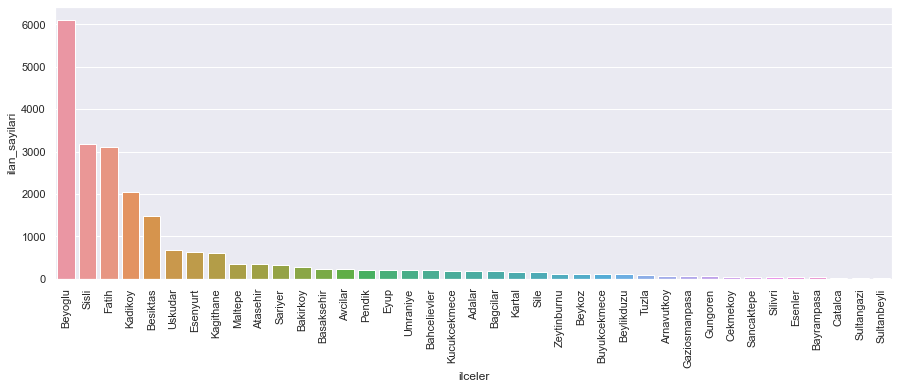

In [10]:
ilce_verisi = veri["ilce"].value_counts().rename_axis('ilceler').reset_index(name='ilan_sayilari')
print(ilce_verisi)
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(x="ilceler", y="ilan_sayilari", data=ilce_verisi)

for item in ax.get_xticklabels():
    item.set_rotation(90)

       oda_tipleri  ilan_sayilari
0  Entire home/apt          11240
1     Private room           9620
2       Hotel room            832
3      Shared room            636


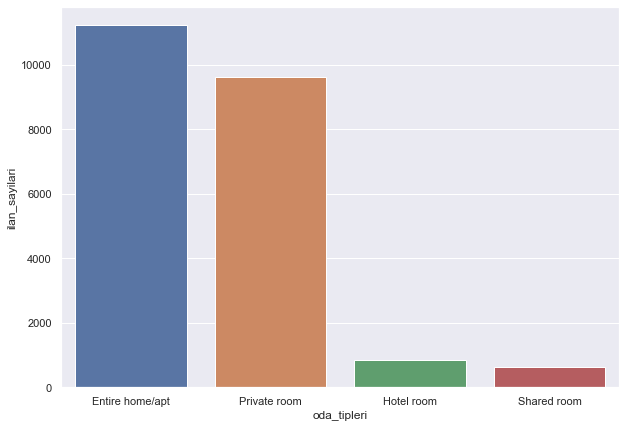

In [11]:
oda_verisi = veri["oda_tipi"].value_counts().rename_axis('oda_tipleri').reset_index(name='ilan_sayilari')
print(oda_verisi)
sns.set_theme(style="darkgrid") 
sns.set(rc={'figure.figsize':(10,7)})

ax = sns.barplot(x="oda_tipleri", y="ilan_sayilari", data=oda_verisi)


    min_gece  gece_sayisi
0          1        12579
1          2         3977
2          3         2415
3          5          687
4          7          686
..       ...          ...
57       730            1
58        75            1
59        92            1
60        61            1
61        16            1

[62 rows x 2 columns]


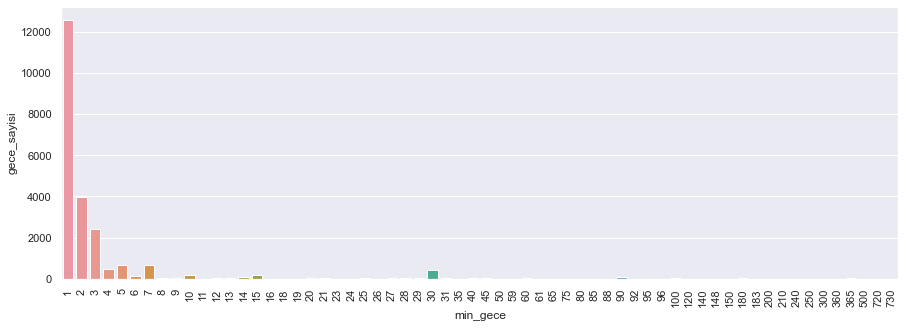

In [12]:
gece = veri["min_gece"].value_counts().rename_axis('min_gece').reset_index(name='gece_sayisi')
print(gece)
sns.set_theme(style="darkgrid") 
sns.set(rc={'figure.figsize':(15,5)}) 
ax = sns.barplot(x="min_gece", y="gece_sayisi", data=gece) 

for item in ax.get_xticklabels():
    item.set_rotation(90)

   degerlendirme  toplam_degerlendirme
0              0                 11599
1              1                  2750
2              2                  1373
3              3                   821
4              4                   555
5              5                   433
6              6                   367
7              7                   292
8              8                   249
9              9                   234


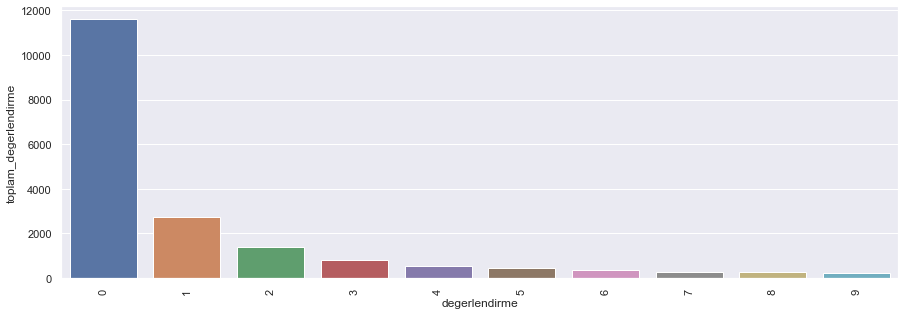

In [13]:
gece = veri["degerlendirme_sayisi"].sort_values().value_counts().head(10).rename_axis('degerlendirme').reset_index(name='toplam_degerlendirme')
print(gece)
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(15,5)}) 

ax = sns.barplot(x="degerlendirme", y="toplam_degerlendirme", data=gece)

for item in ax.get_xticklabels(): 
    item.set_rotation(90)

   degerlendirme  toplam_degerlendirme
0              0                 11599
1              1                  2750
2              2                  1373
3              3                   821
4              4                   555
5              5                   433
6              6                   367
7              7                   292
8              8                   249
9              9                   234


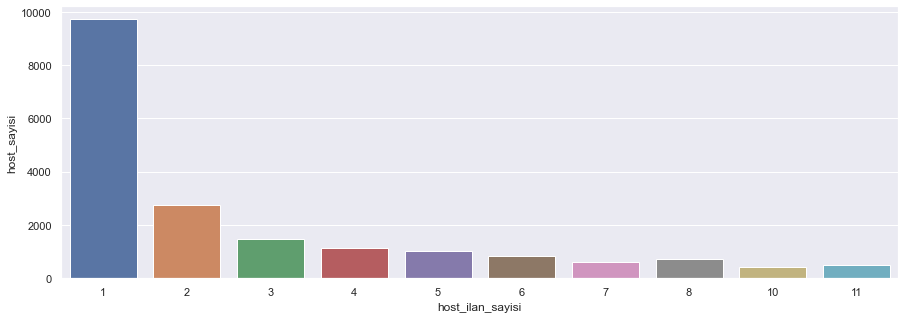

In [14]:
host_ilan = veri["host_ev_sayisi"].sort_values().value_counts().head(10).rename_axis('host_ilan_sayisi').reset_index(name='host_sayisi')
print(gece)
sns.set_theme(style="darkgrid")  
sns.set(rc={'figure.figsize':(15,5)}) 

ax = sns.barplot(x="host_ilan_sayisi", y="host_sayisi", data=host_ilan)


   degerlendirme  toplam_degerlendirme
0              0                 11599
1              1                  2750
2              2                  1373
3              3                   821
4              4                   555
5              5                   433
6              6                   367
7              7                   292
8              8                   249
9              9                   234


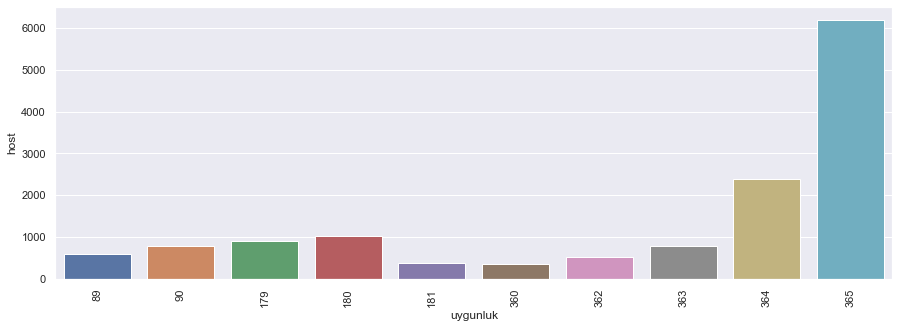

In [15]:
yil_ici_uygunluk = veri["yil_ici_uygunluk"].sort_values(ascending=False).value_counts().head(10).rename_axis('uygunluk').reset_index(name='host')
print(gece)
sns.set_theme(style="darkgrid")  
sns.set(rc={'figure.figsize':(15,5)}) 

ax = sns.barplot(x="uygunluk", y="host", data=yil_ici_uygunluk) 

for item in ax.get_xticklabels(): 
    item.set_rotation(90)

In [16]:
# UPDATING ...
# Enes Çavuş